In [1]:
%matplotlib notebook

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import sys
import importlib
import os

In [4]:
data_path = "data"

In [5]:
name_list = ["944 Hidalgo",
"2016 ND21",
"2060 Chiron",
"10199 Chariklo",
"37117 Narcissus",
"54598 Bienor",
"60558 Echeclus",
"347449 2012 TW236",
"349933 2009 YF7",
"459865 2013 XZ8",
"501585 2014 QA43"]

In [16]:
i=0

In [20]:
df_o = pd.read_csv("{}/{}_ATLAS_Forced_Photometry_o_filter.csv".format(data_path,name_list[i]),index_col=None)
df_c = pd.read_csv("{}/{}_ATLAS_Forced_Photometry_c_filter.csv".format(data_path,name_list[i]),index_col=None)

In [21]:
df_o

,MJD,m,dm,delta,r,alpha,reduced_mag,reduced_dmag
0,58912.600943,16.972,0.020,3.722224,4.527335,8.0905,10.838774,0.020
1,58912.606441,16.969,0.017,3.722197,4.527366,8.0894,10.835775,0.017
2,58912.609828,16.970,0.018,3.722181,4.527386,8.0887,10.836775,0.018
3,58917.486962,17.272,0.082,3.701199,4.555125,7.0779,11.137786,0.082
4,58917.489786,17.310,0.087,3.701188,4.555141,7.0772,11.175785,0.087
...,...,...,...,...,...,...,...,...
727,58572.389708,14.839,0.006,2.024864,2.457897,23.2668,11.354202,0.006
728,58572.403677,14.839,0.006,2.025023,2.457975,23.2667,11.353962,0.006
729,58572.406878,14.850,0.006,2.025060,2.457993,23.2667,11.364908,0.006
730,58392.604031,14.229,0.004,1.621173,1.963369,30.5823,11.714843,0.004


Text(0.5, 0.98, '944 Hidalgo')

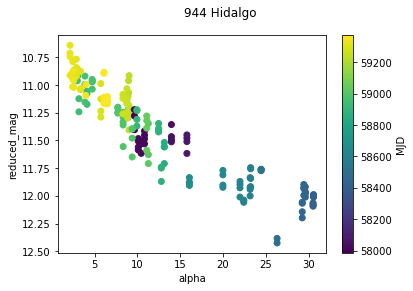

In [23]:
x_plot="alpha"
y_plot="reduced_mag"
c_plot="MJD"

df_plot=df_c

s1=plt.scatter(df_plot["alpha"],df_plot["reduced_mag"],c=df_plot[c_plot])
cbar1=plt.colorbar(s1)

plt.gca().invert_yaxis()

cbar1.set_label(c_plot)
plt.xlabel(x_plot)
plt.ylabel(y_plot)

plt.suptitle(name_list[i])

In [72]:
def phase_plot(df_plot1,df_plot2,name):
    
    x_plot="alpha"
    y_plot="reduced_mag"
    c_plot="MJD"

#     df_plot1=df_o
#     df_plot2=df_c

    fig = plt.figure()
    gs = gridspec.GridSpec(1,3,width_ratios=[1,1,0.1])
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1])
    ax3 = plt.subplot(gs[0,2])

    fig.set_size_inches(10,5)

    # do mjd coloured scatter plots, colour scale fixed with vmin, vmax

    mjd_lims = [np.amin([np.amin(df_plot1[c_plot]),np.amin(df_plot2[c_plot])]),
                 np.amax([np.amax(df_plot1[c_plot]),np.amax(df_plot2[c_plot])])]
#     print(np.amin(df_plot1[c_plot]),np.amax(df_plot1[c_plot]))
#     print(np.amin(df_plot2[c_plot]),np.amax(df_plot2[c_plot]))
#     print(mjd_lims)

    ax1.errorbar(df_plot1[x_plot],df_plot1[y_plot],df_plot1["reduced_dmag"],fmt='ko',zorder=0,markersize="2")
    s1=ax1.scatter(df_plot1[x_plot],df_plot1[y_plot],c=df_plot1[c_plot],vmin = mjd_lims[0],vmax = mjd_lims[1],s=10)
    # cbar1=fig.colorbar(s1,ax3,use_gridspec=True)

    ax2.errorbar(df_plot2[x_plot],df_plot2[y_plot],df_plot2["reduced_dmag"],fmt='ko',zorder=0,markersize="2")
    s2=ax2.scatter(df_plot2[x_plot],df_plot2[y_plot],c=df_plot2[c_plot],vmin = mjd_lims[0],vmax = mjd_lims[1],s=10)
    cbar2=fig.colorbar(s2,ax3,use_gridspec=True)

    cbar1.set_label(c_plot)
    ax1.set_xlabel(x_plot)
    ax1.set_ylabel(y_plot+" o")
    ax2.set_xlabel(x_plot)
    ax2.set_ylabel(y_plot+" c")


    # set axes limits to get same scales on both plots
    xlims1 = ax1.get_xlim()
    xlims2 = ax2.get_xlim()
    x_lims = [np.amin([xlims1[0],xlims2[0]]),np.amax([xlims1[1],xlims2[1]])]
    ylims1 = ax1.get_ylim()
    ylims2 = ax2.get_ylim()
    y_lims = [np.amin([ylims1[0],ylims2[0]]),np.amax([ylims1[1],ylims2[1]])]
    ax1.set_xlim(x_lims)
    ax1.set_ylim(y_lims[::-1])
    ax2.set_xlim(x_lims)
    ax2.set_ylim(y_lims[::-1])

    fig.suptitle(name_list[i])

    plt.tight_layout()

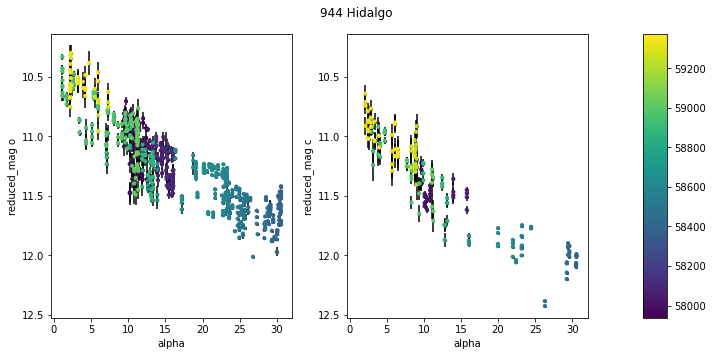

In [73]:
phase_plot(df_plot1=df_o,df_plot2=df_c,name=name_list[i])

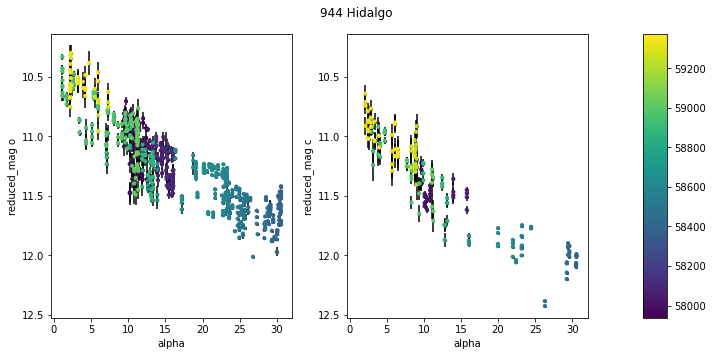

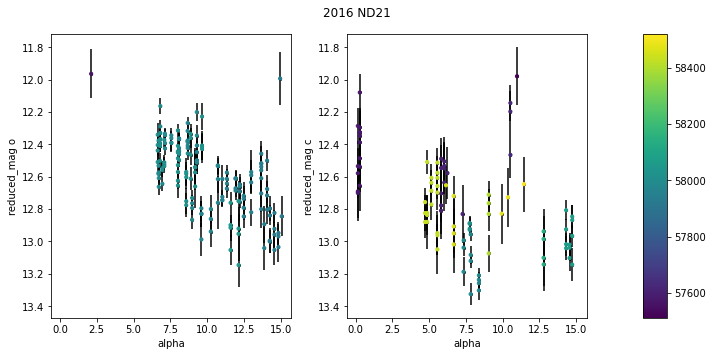

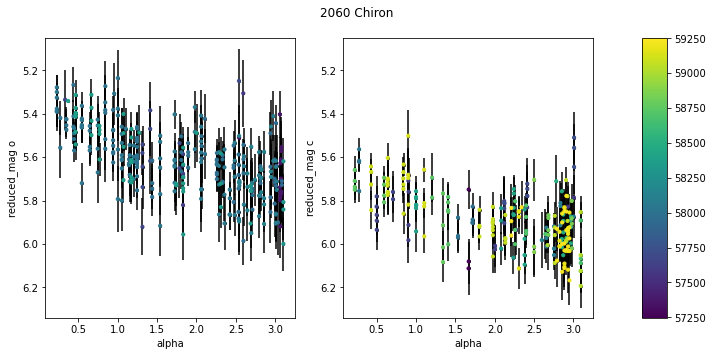

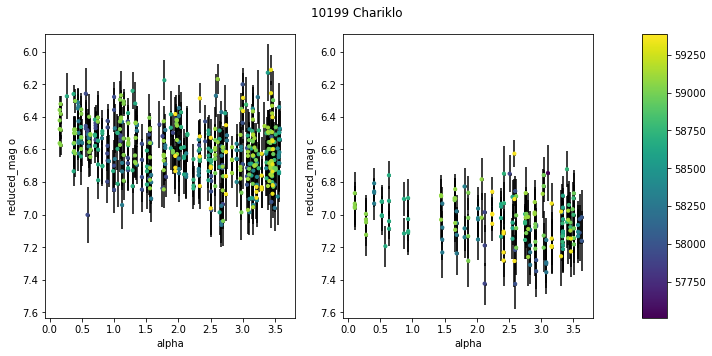

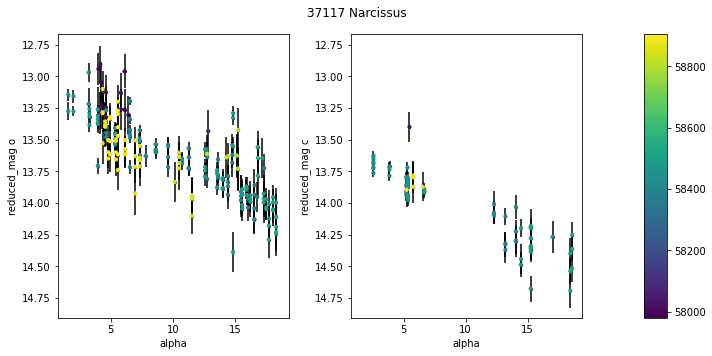

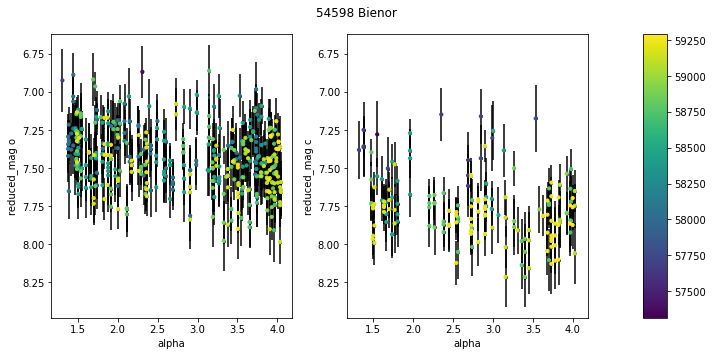

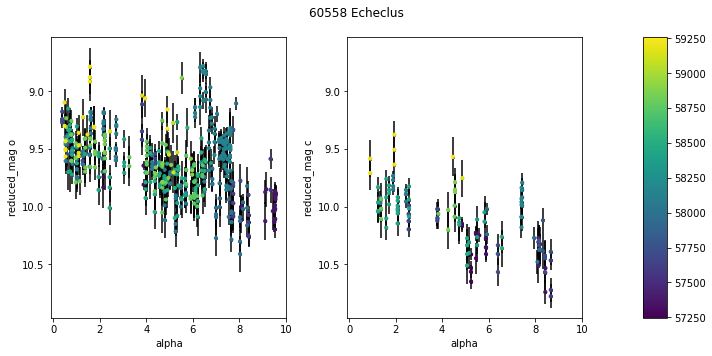

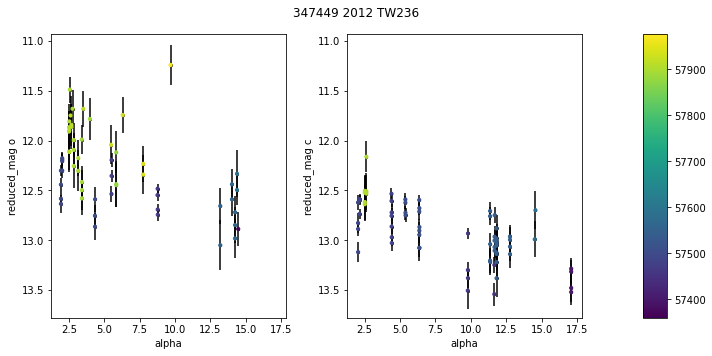

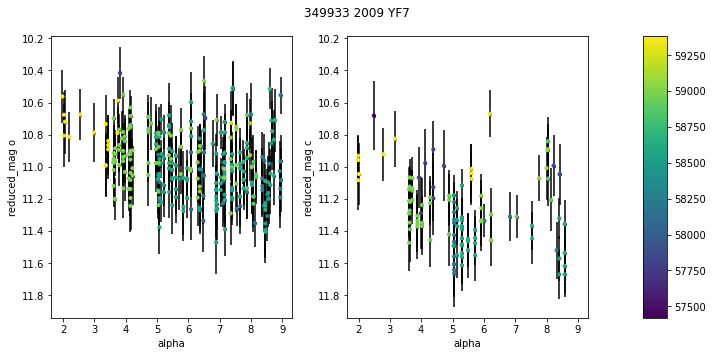

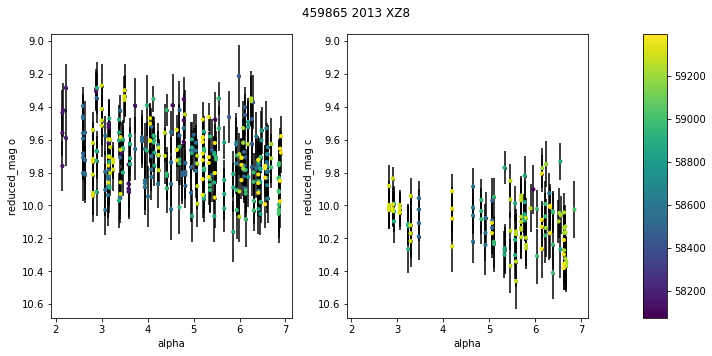

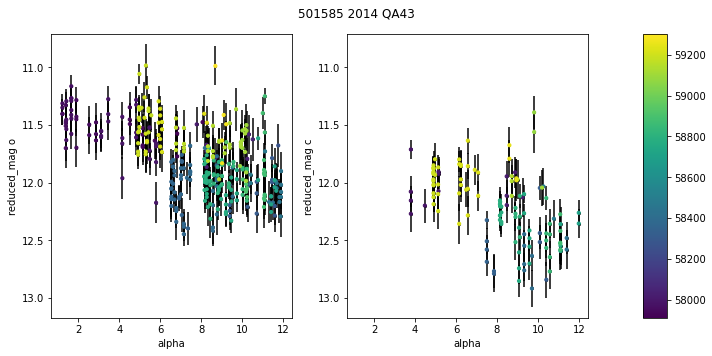

In [74]:
for i in range(len(name_list)):
    df_o = pd.read_csv("{}/{}_ATLAS_Forced_Photometry_o_filter.csv".format(data_path,name_list[i]),index_col=None)
    df_c = pd.read_csv("{}/{}_ATLAS_Forced_Photometry_c_filter.csv".format(data_path,name_list[i]),index_col=None)
    phase_plot(df_plot1=df_o,df_plot2=df_c,name=name_list[i])